## test Moran data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

%matplotlib inline

In [2]:
dir_data = '/home/pedro/repos/lfi-models/lfimodels/moran'

LTP_data1 = pd.read_csv(dir_data+'/LTP_normalised.csv', index_col = 0)
LTP_data2 = pd.read_csv(dir_data+'/LTP_data_norm_complete.csv', index_col = 0)
LTP_data3 = pd.read_csv(dir_data+'/Bume_data_norm.csv', index_col = 0)

In [3]:
rec_WT_original = ['WT', 'WT.1', 'WT.3', 'WT.4', 'WT.5', 'WT.6',  'WT.8']
rec_Ts_original = ['Ts65Dn', 'Ts65Dn.1', 'Ts65Dn.3', 'Ts65Dn.4', 'Ts65Dn.5','Ts65Dn.6', 'Ts65Dn.8']
rec_WT = ['WT_slice-'+str(i+1) for i in range(14)]
rec_Ts = ['Ts65Dn_slice-'+str(i+1) for i in range(14)]
rec_Ts_Bume = ['BUME_slice-'+str(i+1) for i in range(17)]
rec_Ts_DMSO = ['DMSO_slice-'+str(i+1) for i in range(19)]

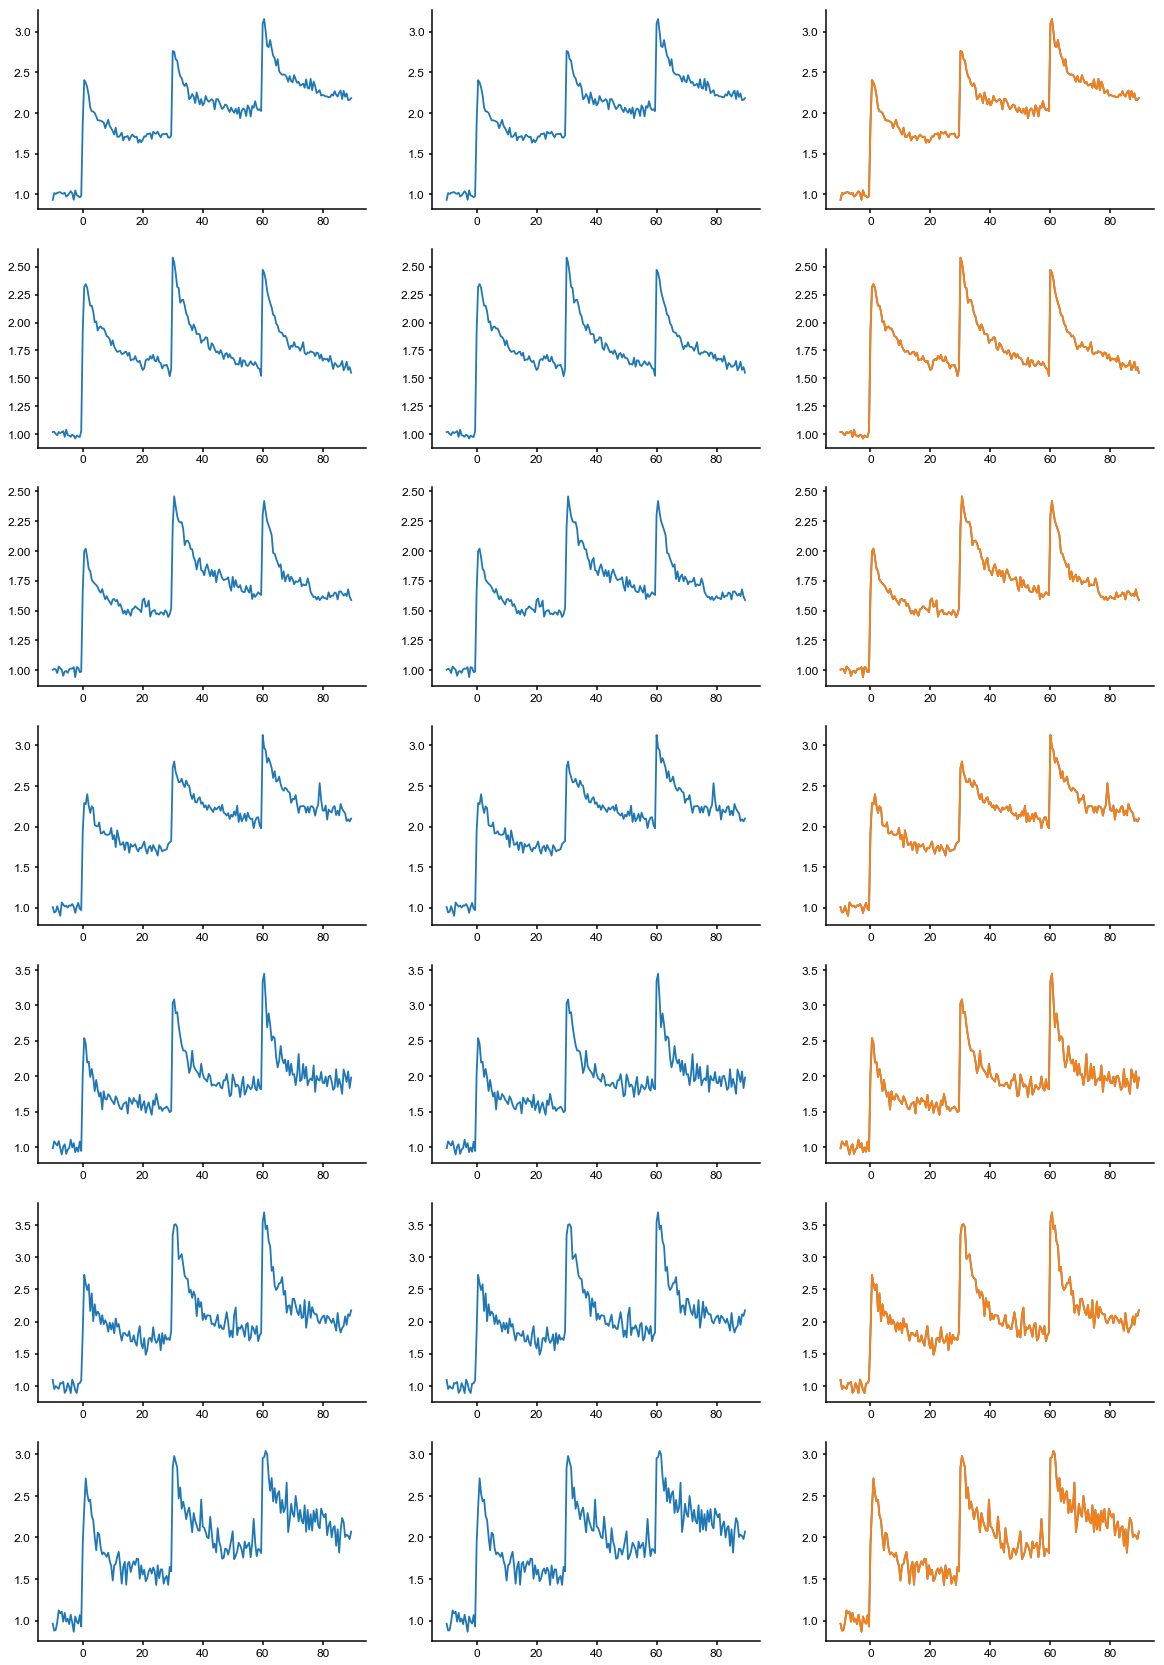

In [4]:
plt.figure(figsize=(20,30))

for i in range(7):    
    rec1 = rec_WT_original[i]
    rec2 = rec_WT[i]

    data1 = np.asarray(LTP_data1[rec1]).reshape(-1)
    time1 = np.asarray(LTP_data1['Time']).reshape(-1)
    data2 = np.asarray(LTP_data2[rec2]).reshape(-1)
    time2 = np.asarray(LTP_data2['Time']).reshape(-1)

    plt.subplot(7,3,3*i+1)
    plt.plot(time1,data1)
    
    plt.subplot(7,3,3*i+2)
    plt.plot(time2,data2)
    
    plt.subplot(7,3,3*i+3)
    plt.plot(time1,data1)
    plt.plot(time2,data2)

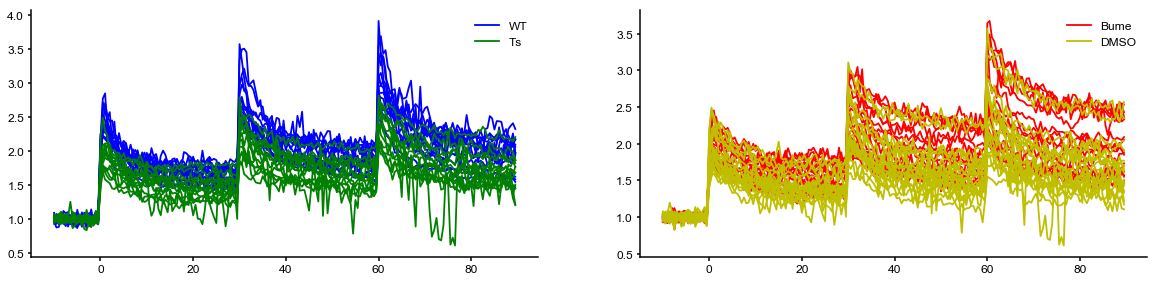

In [5]:
plt.figure(figsize=(20,10))

for i in range(len(rec_WT)):
    rec1 = rec_WT[i]
    data1 = np.asarray(LTP_data2[rec1]).reshape(-1)
    time1 = np.asarray(LTP_data2['Time']).reshape(-1)
    
    plt.subplot(2,2,1)
    if i==0:
        plt.plot(time1,data1,'b',label='WT')
    else:
        plt.plot(time1,data1,'b')
    
for i in range(len(rec_Ts)):
    rec1 = rec_Ts[i]
    data1 = np.asarray(LTP_data2[rec1]).reshape(-1)
    time1 = np.asarray(LTP_data2['Time']).reshape(-1)
    
    plt.subplot(2,2,1)
    if i==0:
        plt.plot(time1,data1,'g',label='Ts')
        plt.legend()
    else:
        plt.plot(time1,data1,'g')

for i in range(len(rec_Ts_Bume)):
    rec1 = rec_Ts_Bume[i]
    data1 = np.asarray(LTP_data3[rec1]).reshape(-1)
    time1 = np.asarray(LTP_data3['Time']).reshape(-1)
    
    plt.subplot(2,2,2)
    if i==0:
        plt.plot(time1,data1,'r',label='Bume')
        plt.legend()
    else:
        plt.plot(time1,data1,'r')
    
for i in range(len(rec_Ts_DMSO)):
    rec1 = rec_Ts_DMSO[i]
    data1 = np.asarray(LTP_data3[rec1]).reshape(-1)
    time1 = np.asarray(LTP_data3['Time']).reshape(-1)
    
    plt.subplot(2,2,2)
    if i==0:
        plt.plot(time1,data1,'y',label='DMSO')
        plt.legend()
    else:
        plt.plot(time1,data1,'y')

In [6]:
time1 = np.asarray(LTP_data2['Time']).reshape(-1)

data_WT = []
for i in range(len(rec_WT)):
    rec1 = rec_WT[i]
    data_WT.append(np.asarray(LTP_data2[rec1]).reshape(-1))

data_Ts = []
for i in range(len(rec_Ts)):
    rec1 = rec_Ts[i]
    data_Ts.append(np.asarray(LTP_data2[rec1]).reshape(-1))

data_Ts_Bume = []
for i in range(len(rec_Ts_Bume)):
    rec1 = rec_Ts_Bume[i]
    data_Ts_Bume.append(np.asarray(LTP_data3[rec1]).reshape(-1))

data_Ts_DMSO = []
for i in range(len(rec_Ts_DMSO)):
    rec1 = rec_Ts_DMSO[i]
    data_Ts_DMSO.append(np.asarray(LTP_data3[rec1]).reshape(-1))
    

data_WT = np.asarray(data_WT)
data_Ts = np.asarray(data_Ts)
data_Ts_Bume = np.asarray(data_Ts_Bume)
data_Ts_DMSO = np.asarray(data_Ts_DMSO)

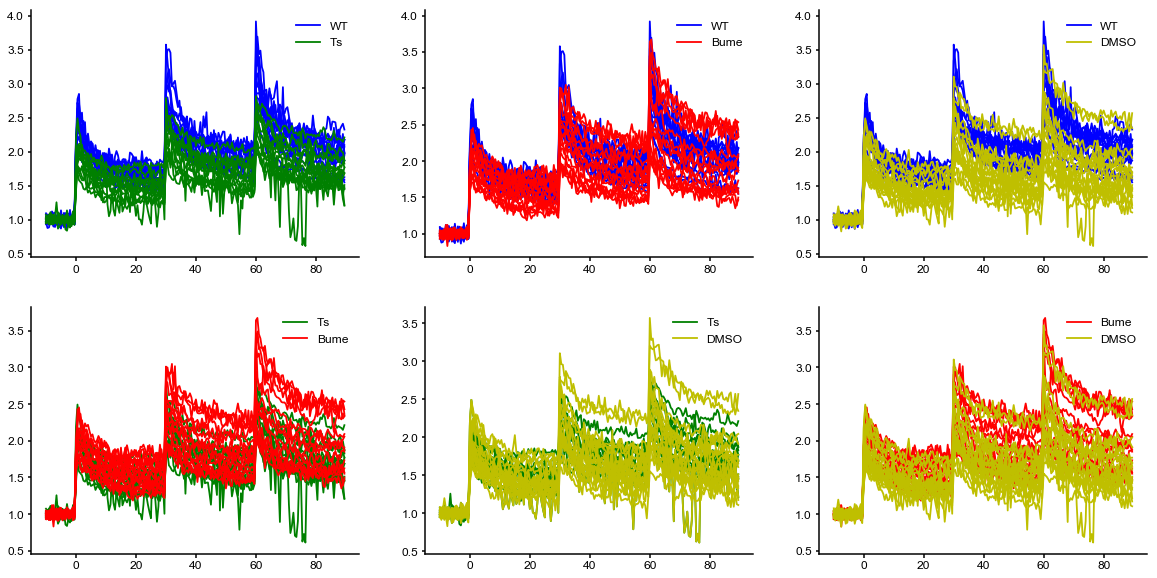

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot(time1,data_WT[:-1].T,'b')
plt.plot(time1,data_WT[-1],'b',label='WT')
plt.plot(time1,data_Ts[:-1].T,'g')
plt.plot(time1,data_Ts[-1],'g',label='Ts')
plt.legend()

plt.subplot(2,3,2)
plt.plot(time1,data_WT[:-1].T,'b')
plt.plot(time1,data_WT[-1],'b',label='WT')
plt.plot(time1,data_Ts_Bume[:-1].T,'r')
plt.plot(time1,data_Ts_Bume[-1],'r',label='Bume')
plt.legend()

plt.subplot(2,3,3)
plt.plot(time1,data_WT[:-1].T,'b')
plt.plot(time1,data_WT[-1],'b',label='WT')
plt.plot(time1,data_Ts_DMSO[:-1].T,'y')
plt.plot(time1,data_Ts_DMSO[-1],'y',label='DMSO')
plt.legend()

plt.subplot(2,3,4)
plt.plot(time1,data_Ts[:-1].T,'g')
plt.plot(time1,data_Ts[-1],'g',label='Ts')
plt.plot(time1,data_Ts_Bume[:-1].T,'r')
plt.plot(time1,data_Ts_Bume[-1],'r',label='Bume')
plt.legend()

plt.subplot(2,3,5)
plt.plot(time1,data_Ts[:-1].T,'g')
plt.plot(time1,data_Ts[-1],'g',label='Ts')
plt.plot(time1,data_Ts_DMSO[:-1].T,'y')
plt.plot(time1,data_Ts_DMSO[-1],'y',label='DMSO')
plt.legend()

plt.subplot(2,3,6)
plt.plot(time1,data_Ts_Bume[:-1].T,'r')
plt.plot(time1,data_Ts_Bume[-1],'r',label='Bume')
plt.plot(time1,data_Ts_DMSO[:-1].T,'y')
plt.plot(time1,data_Ts_DMSO[-1],'y',label='DMSO')
plt.legend();